**신경망 예제**
1. binary classification; ex) 영화 리뷰를 긍정 또는 부정으로 분류하기
2. multiclass classification; ex) 신문기사를 토픽으로 분류하기
3. regression; ex) 부동산 데이터를 바탕으로 주택 가격을 예측하기

# 3.1 신경망의 구조

>**keyward**   
>1. network를 구성하는 layer
>2. input data와 그에 상응하는 target
>3. train에 사용할 피드백 신호를 정의하는 loss 함수
>4. 학습 진행방식을 결정하는 optimizer

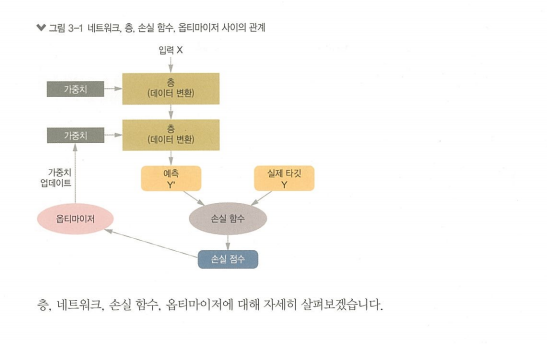

* 연속된 layer로 구성된 network가 input data를 predict으로 mapping한다
* loss 함수는 predict 값과 target을 비교해 network 예측이 target에 얼마나 잘 맞는지를 측정하는 손실값을 만듬
* optimizer는 손실 값을 사용해 network 가중치를 update한다

## 1) layer: 딥러닝의 구성 단위
layer는 하나 이상의 tensor를 input으로 받아 하나 이상의 tensor를 출력
- layer는 상태를 가진다; **weight(가중치)**이라는 상태를 가진다
    + 가중치 SGD에 의해 학습되는 tensor이며 여기에 network가 학습한 지식이 담김
- layer 마다 data 처리 방식이 다르다
    1. (samples, features)크기인 2D tensor가 저장된 간단한 vector data는;    
        fully connected layer나 densely connected layer에 의해 처리된다
        * keras에선 Dense class다
    2. (samples,timesteps, features)크기인 3D tensor로 저장된 squence data는;   
        LSTM 같은 순환 층(recurrnet layer)에 의해 처리된다
    3. 4D tensor인 img data의 경우;   
        일반적으로 2D convolution layer에 의해 처리

In [61]:
from keras import layers

# 첫번째 차원이 784인, 2D tensor만 입력으로 받는 layer 생성
# 유닛이 32개로 돼있는 Dense layer
layer=layers.Dense(32, input_shape=(784, ))

* Output으로 첫번째 차원 크기가 32로 변환된 tensor 출력
>**TIP**   
>2D tensor의 0번째 축은 지정하지 않았기 때문에, 어떤 배치 크기도 입력으로 받을 수 있다. 즉, 어떤 sample의 크기도 받을 수 있다

In [70]:
from keras import models
from keras import layers

model= models.Sequential()
model.add(layers.Dense(32,input_shape=(784,)))
model.add(layers.Dense(10))

In [71]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_39 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


* 두번째 layer에서 input_shape의 매개변수를 지정해주지 않음
    + 대신 앞선 layer의 output 크기를 input 크기로 자동 채택함

## 2) model: layer의 network

> *POINT_1*   
>deeplearning model은 directed acyclic graph(DAG)이다.
> * 비순환 유향 그래프는 그래프의 edge에 방향이 있고 한 node에서 다시 자기 자신으로 돌아올 경로가 없는 그래프다    

#### Network 구조
* 종류
    1. brach가 2개인 network
    2. output이 여러개인 network
    3. Inception 블록

* network 구조는 hypothesis space를 정의

>`` Lets say you have an unknown target function f:X→Y that you are trying to capture by learning.   
In order to capture the target function you have to come up with some hypotheses h1,...,hn where h∈H.   
Here, H is your hypothesis space or set.``

- machine learning이란, "가능성이 있는 공간을 사전에 정의하고 피드백 신호의 도움을 받아 input data에 대한 유용한 변환을 찾는 것 "
    - network 구조를 선택함으로써;   
        hypothesis space를 input data에서 output data로 mapping하는 일련의 특정 tensor 연산으로 제한
    

## 3) loss 함수와 optimizer: train을 조절하는 열쇠
#### 1. loss function(objective function): 
* 훈련하는 동안 최소화될 값
* 주어진 문제에 대한 성공 지표

#### 2. optimizer: 
* loss function을 기반으로 network가 어떻게 update될지 결정
* 특정 종류는 SGD을 구현

여러개의 Output을 내는 신경망은 여러개의 손실 함수를 가질 수 있다. -> 출력당 하나씩
>**Warn**    
> SGD 과정은 하나의 scalar loss 값을 기준으로 한다.   
> 따라서 loss가 여러개인 network에서는 모든 loss를 평균내어 하나의 scalar 양으로 합침

**문제에 맞는 올바른 objective function을 선택하는 것은 아주 중요함**   
 "모든 인류의 평균 행복 지수를 최대화하기"와 같은 잘못된 목적함수에서 SGD로 훈련된 전지전능하지만 멍청한 AI는 원치않는 효과를 초래
 - 우리가 만든 모든 신경망은 단지 손실 함수를 최소화하기만 한다
 
 #### 올바른 loss function을 선택하는 지침
 1. 2개의 class가 있는 classification 문제에는 binary crossentropy 사용
 2. 여러개의 class가 있는 classification 문제에는 categorical crossentropy 사용
 3. regression 문제에는 평균제곱오차 사용
 4. squence train 문제에는 CTC(Connected Temporal Classification) 등을 사용

# 3.2 Keras 소개

이 책에서는 code 예제를 위해 keras를 사용    
keras는 거의 모든 종류의 딥러닝 모델을 간편하게 만들고 훈련시킬 수 있는 파이썬을 위한 딥러닝 frame work다.   

#### keras 특징
1. 동일한 code로 CPU, GPU에서 실행할 수 있다
2. 사용하기 쉬운 API를 가지고 있어 딥러닝 모델의 proto type을 빠르게 만들 수 있다
3. computer vision을 위한 convolution 신경망, squence 처리를 위한 순환 신경망을 지원하며, 이 둘을 자유롭게 조합하여 사용할 수 있다
4. 다중 입력이나 다중출력 model, layer의 공유, model 공유 등 어떤 network 구조도 만들 수 있다. 
    - 즉, GAN부터 뉴럴튜링머신까지 어떤 딥러닝 모델에도 적합하다

### 1) keras, tensorflow, 씨아노, CNIK
책읽어보기

### 2) **keas를 사용한 개발**

1. input tensor와 target tensor로 이뤄진 train data를 정의
2. input과 target을 mapping 하는 layer로 이뤄진 network 정의
3. loss function, optimizer, matric을 선택하여 train 과정 설정
4. train data에 대해 model의 fit() method를 반복적으로 호출

모델을 정의하는 방법은 2가지다; Sequential class, 함수형 API

Sequential class

In [72]:
from keras import models
from keras import layers

model= models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

함수형 API

In [74]:
input_tensor=layers.Input(shape=(784,))
x=layers.Dense(32, activation='relu')(input_tensor)
output_tensor=layers.Dense(10,activation='softmax')(x)

model=models.Model(inputs=input_tensor, outputs=output_tensor)

이후 동일하게 compile, fit 하면 됨

In [75]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='mes',
             metrics=['accuracy'])

In [76]:
model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)

NameError: name 'target_tensor' is not defined

# 3.4 영화리뷰 분류: Binary classification 예제

### IMDB data set
- 인터넷 영화 데이터베이스로부터 가져온 양극단의 리뷰 5만개
- train data: 25000개, test data: 25000개
    + 각각은 부정 50% 긍정 50%로 나뉨
    
- keras dataset에 포함
    + 전처리되어 각 리뷰가 숫자 squence로 변환되어 있음
    + 각 숫자는 고유한 단어를 나타냄

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) # 자주 나타나는 단어 10000개만 사용하겠다

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [81]:
len(train_data)

25000

In [1]:
len(train_data[1])

NameError: name 'train_data' is not defined

In [29]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

train label에는 부정을 나타내는 '0'과 긍정을 나타내는 '1'의 리스트로 이뤄짐

In [4]:
train_labels[0]

1

가장 자주 등장하는 단어 10000개를 설정해놨기 때문에 index는 10000을 넘지 않음

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
# word_index는 단어와 정수 인덱스를 매핑한 딕셔너리입니다
word_index = imdb.get_word_index()
# 정수 인덱스와 단어를 매핑하도록 뒤집습니다
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 리뷰를 디코딩합니다. 
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## 1) Data

신경망에 list를 주입할 수 는 없다.   
따라서 list를 tensor로 변환해야함;
1. 같은 길이가 되도록 list에 padding을 추가하고 (samples, squence_lenght)크기의 정수 tensor로 변환
2. list를 one-hot encoding하여 0과 1의 vector로 변환

In [9]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

#### Label, vector 변환

In [11]:
# 레이블을 벡터로 바꿉니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [30]:
y_train[0]

1.0

## 2) model 구축하기

input data가 vector(하나당 shape(1,10000))고, label은 scalar(1 or 0)이다.   
이런 문제에 잘 작동하는 network는;
- relu 활성화 함수를 사용한 fully connected layer(즉, Dense(16, activation='relu'))이다
    + output=relu(dot(w,input)+b)

In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

- 첫번째 layer에 전달한 매개변수 16은 hidden unit의 개수를 의미한다   
     + 가중치 행렬 w의 크기가 (input_dimension, 16)
     
> hidden unit이 늘어나멵 신경망이 더욱 복잡한 표현학습을 할 수 있지만, 계산비용이 커지고 원치않는 패턴을 학습할 수 도 있다(overfitting)

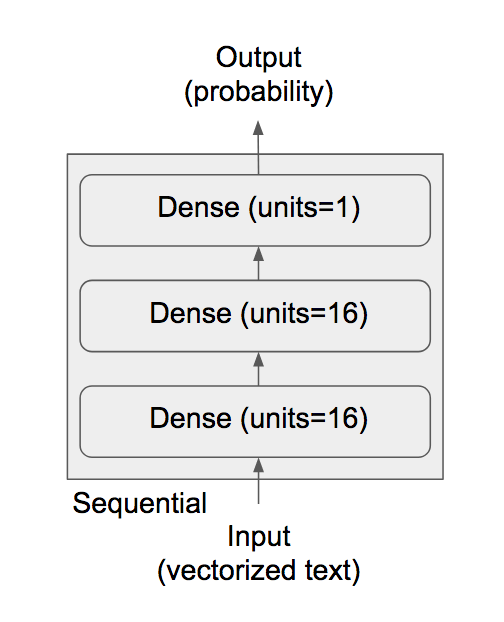

Dense layer을 쌓을 때 두 가지를 고려해야 함
1. 얼마나 많은 층을 사용할 것인가
2. 각 층에 얼마나 많은 은닉 유닛을 둘것인가

> **relu**   
> 음수를 0으로 만드는 함수   
>**sigmoid**   
>임의의 값을 [0,1] 사이로 압축하므로 출력값을 확률처럼해석할 수 있다


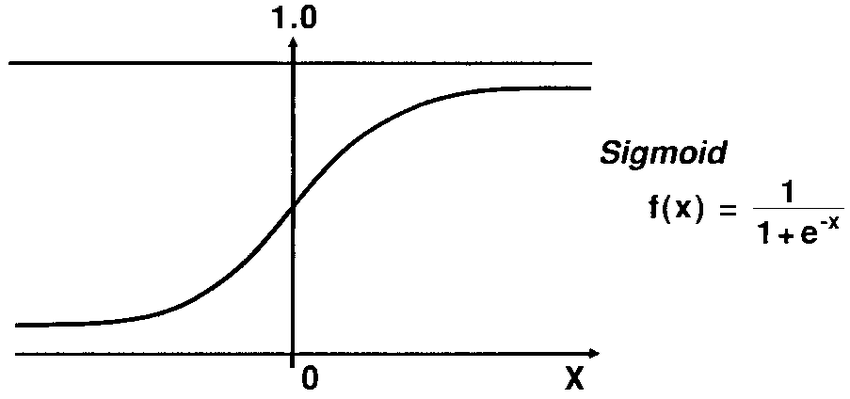

> **TIP**   
> **활성화 함수란 무엇인가?**   
> relu같은 활성화 함수 즉, 비선형성 연산이 없다면 Dense layer는 선형적인 연산인 아핀변환만을 학습할 수 있다
>* 이렇게 쌓인 network는 아무리 깊게 layer를 쌓아도 하나의 선형 연산이기 때문에 층을 여러개로 나누는 장점이 없다
>* hypothesis 공간을 풍부하게 만들기 위해서는 비선형성 또는 활성화 함수를 추가해야 한다

## 3) loss function과 optimizer 선택

binary classification이고 신경망의 출력이 확률이기 떄문에;    
loss function으로는 binary crossentropy 손실이 적합하다
- mean_squared_error도 사용할 수 있다


> **cross entropy**   
> 확률분포간의 차이를 측정   
> $Hp,q(X)=−∑i=1Np(xi)logq(xi)$

>평균 제곱 오차, MSE(Mean Squared Error)   
>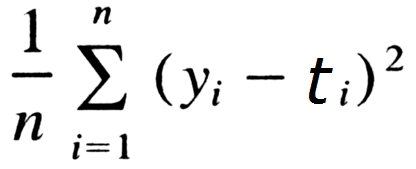

optimizer   
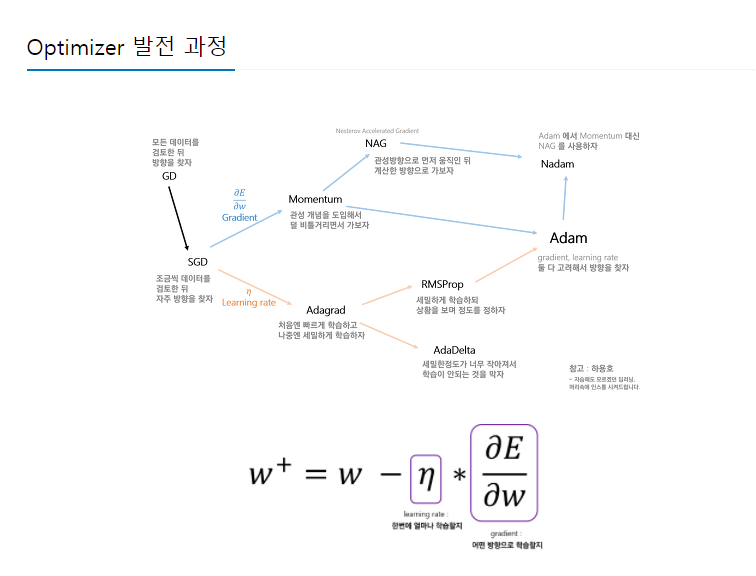

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

keras에는 rmsprop, binary_crossentropy, accuracy가 문자열로 저장되어 있어 위처럼 써도 됨

In [31]:
# 매개변수를 변경해야 할 경우
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [16]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### 4) Validation

train data애서 10000개의 sample을 떼어내 validation set을 만들어줌

In [17]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

512개의 미니 배치를 만들어 20번의 epoch 동안 훈련

In [18]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 30ms/step - loss: 0.6028 - accuracy: 0.6782 - val_loss: 0.3841 - val_accuracy: 0.8705
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3210 - accuracy: 0.9006 - val_loss: 0.3049 - val_accuracy: 0.8812
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2217 - accuracy: 0.9291 - val_loss: 0.2912 - val_accuracy: 0.8828
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1738 - accuracy: 0.9439 - val_loss: 0.2935 - val_accuracy: 0.8821
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1416 - accuracy: 0.9550 - val_loss: 0.2827 - val_accuracy: 0.8887
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1147 - accuracy: 0.9655 - val_loss: 0.3317 - val_accuracy: 0.8733
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0878 - accuracy: 0.9752 - val_loss: 0.3232 - val_accuracy: 0.8810
Epoch 8/20
30

model.fit은 history 객체 반환

In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

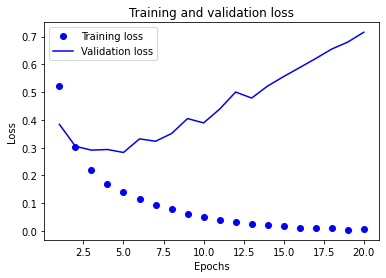

In [22]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

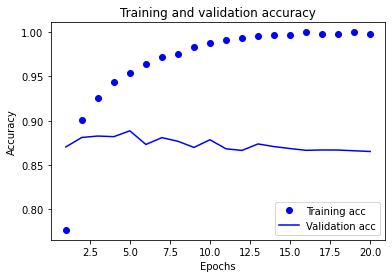

In [25]:
plt.clf()   # 그래프를 초기화합니다
history_dict=history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

- train loss가 ephoch마다 감소하고 train acc는 ephoc마다 증가
- 그러나 validation loss와 acc는 train과 다름
    + 4번째 ephoc에서 그래프가 역전됨

이를 과대적합 되었다고 한다    
과대적합을 막기위해 
1. 3번째 ephoc 이후에는 train 중지

In [26]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.5374 - accuracy: 0.7512
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2643 - accuracy: 0.9097
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.1945 - accuracy: 0.9343
Epoch 4/4
782/782 [==============================] - 1s 982us/step - loss: 0.2980 - accuracy: 0.8824


In [27]:
results

[0.2980302572250366, 0.8823999762535095]

#### 5) 새로운 data에 대해 predict

In [28]:
model.predict(x_test)

array([[0.22951287],
       [0.9995477 ],
       [0.9420224 ],
       ...,
       [0.09692585],
       [0.09280217],
       [0.52281505]], dtype=float32)